# 使用滚动预测的方法，利用ARIMA模型进行预测

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import pearsonr
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("Train.csv")
train['Datetime'] = pd.to_datetime(train.Datetime, format='%Y/%m/%d')
test = pd.read_csv("Test.csv")
test['Datetime'] = pd.to_datetime(test.Datetime, format='%Y/%m/%d')

# 平稳性检验

In [3]:
dftest = adfuller(train['DailyMaximumDryBulbTemperature'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                   -3.400977
p-value                           0.010926
#Lags Used                       16.000000
Number of Observations Used    2859.000000
Critical Value (1%)              -3.432639
Critical Value (5%)              -2.862551
Critical Value (10%)             -2.567308
dtype: float64


# ACF PACF图形定阶

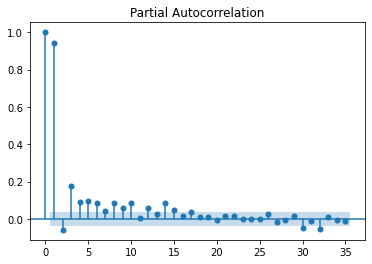

In [4]:
plot_pacf(train['DailyMaximumDryBulbTemperature'])
plt.show()

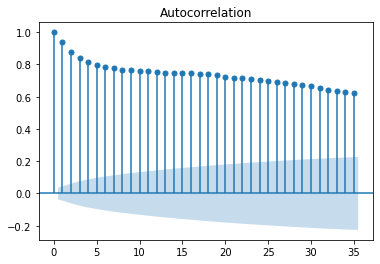

In [5]:
plot_acf(train['DailyMaximumDryBulbTemperature'])
plt.show()

# 根据AIC准则选择最优阶数

In [6]:
# train_results = arma_order_select_ic(train['DailyMaximumDryBulbTemperature'], ic=[ 'aic', 'bic'], max_ar= 10, max_ma= 10)
# print( 'AIC', train_results.aic_min_order)
# print( 'BIC', train_results.bic_min_order)
# 数据量太多，跑不出来了，不妨假设一个order测试一下

In [7]:
history = [x for x in train['DailyMaximumDryBulbTemperature']]
predictions = list()

In [12]:
for t in range(len(test)):
    ml = ARIMA(history, order=(2,0,2))
    ml_fit = ml.fit()
    yhat = ml_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test['DailyMaximumDryBulbTemperature'][t])

In [13]:
# model = ARIMA(train['DailyMaximumDryBulbTemperature'], order=(15,0,10),dates=train['Datetime'],freq='D')
# model_fit = model.fit()

In [14]:
# ARIMA_fit=model_fit.predict(start=20,end=len(train)-1)
# ARIMA_pre=model_fit.forecast(len(test),alpha=0.05) # 设置95%置信区间，显示预测数据

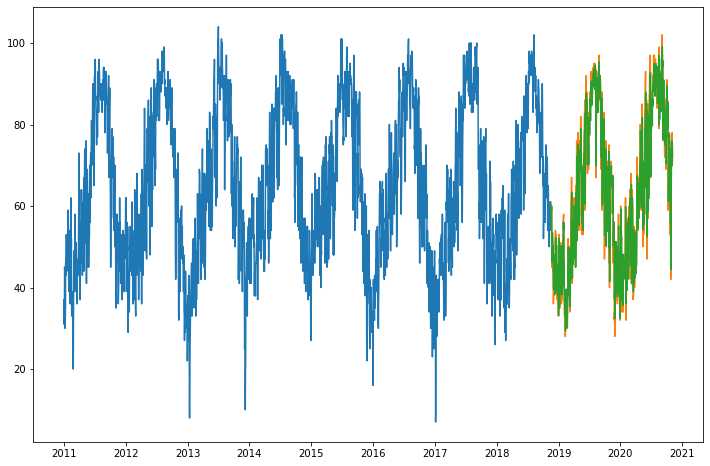

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(train.Datetime, train['DailyMaximumDryBulbTemperature'], label='Train')
# plt.plot(train.Datetime[4:], ARIMA_fit, label='ARIMA fit')
plt.plot(test.Datetime, test['DailyMaximumDryBulbTemperature'], label='Test')
plt.plot(test.Datetime, predictions[3:], label='ARIMA predict')
plt.show()

In [22]:
mse = mean_squared_error(test.DailyMaximumDryBulbTemperature, predictions[3:])
rmse = sqrt(mean_squared_error(test.DailyMaximumDryBulbTemperature, predictions[3:]))
mse,rmse

(37.41827263280347, 6.1170477056177575)